### Spotify Eda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   Time Stamp         149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB
None
        spotify_track_uri     Time Stamp    platform  ms_played  \
0  2J3n32GeLmMjwuAzyhcSNe  7/8/2013 2:44  web player       3185   
1  1oHxIPqJyvAYHy0PVrDU98  7/8/2013 2:45  web player      61865   

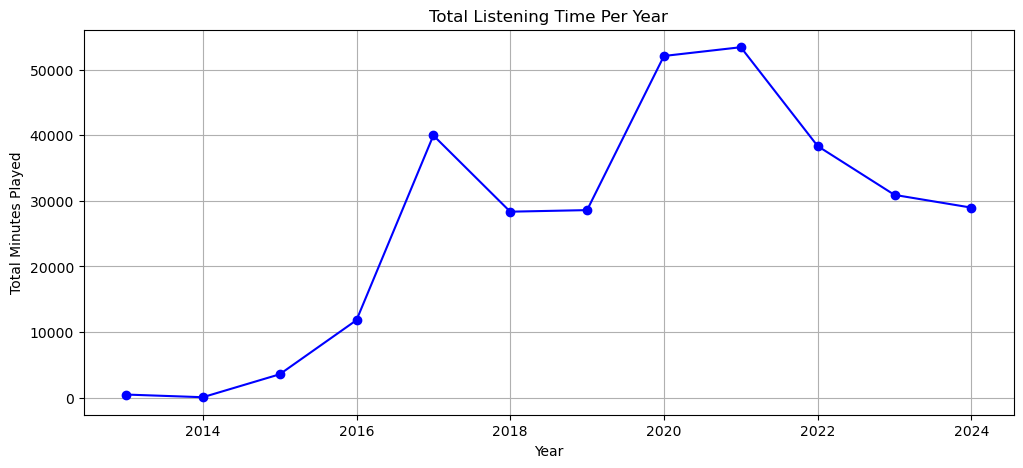

C:\Users\abeer\AppData\Local\Temp\ipykernel_14104\1703445732.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="viridis")


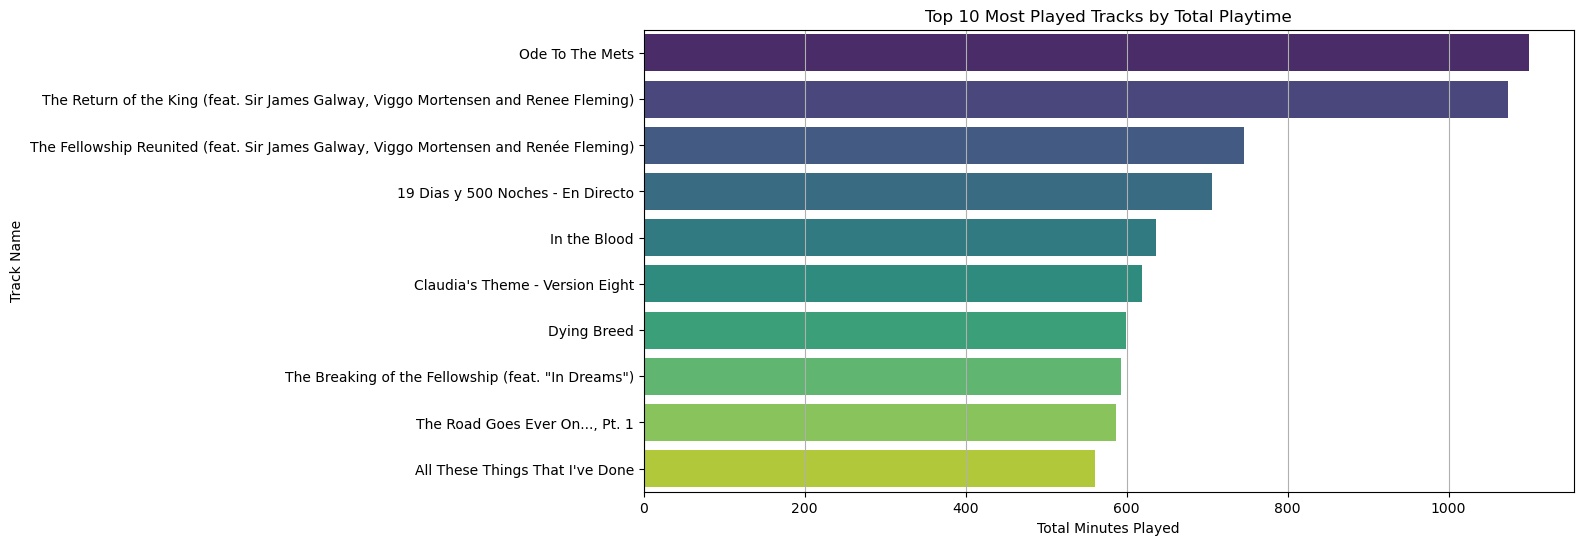

C:\Users\abeer\AppData\Local\Temp\ipykernel_14104\1703445732.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="coolwarm")


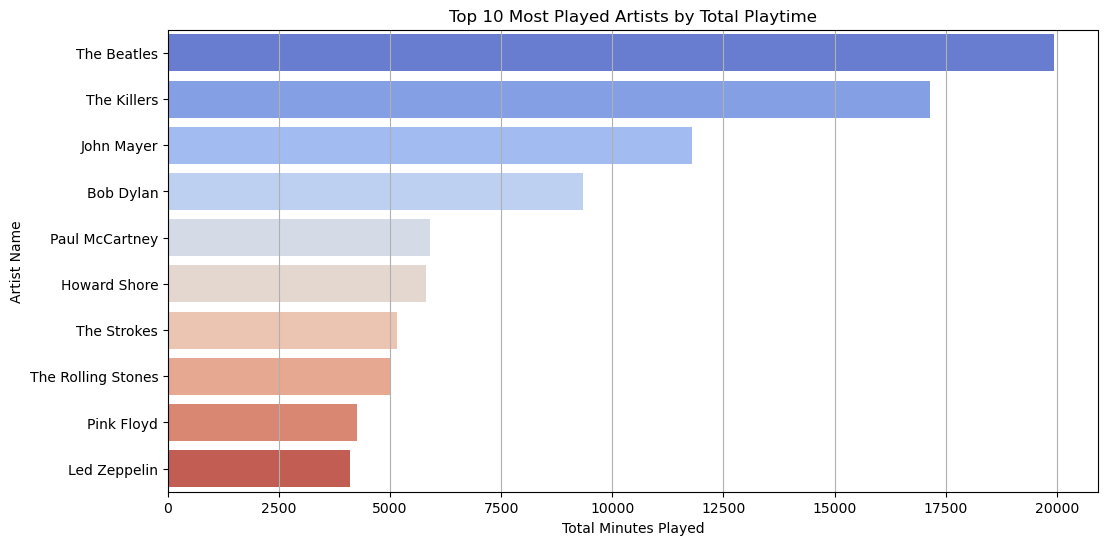

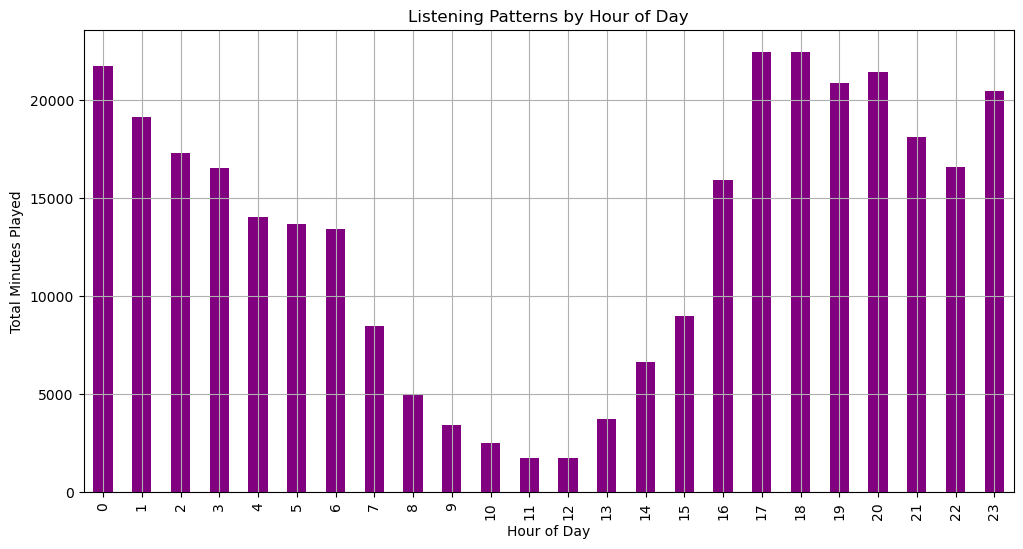

C:\Users\abeer\AppData\Local\Temp\ipykernel_14104\1703445732.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], y=weekday_vs_weekend.values, palette="cool")


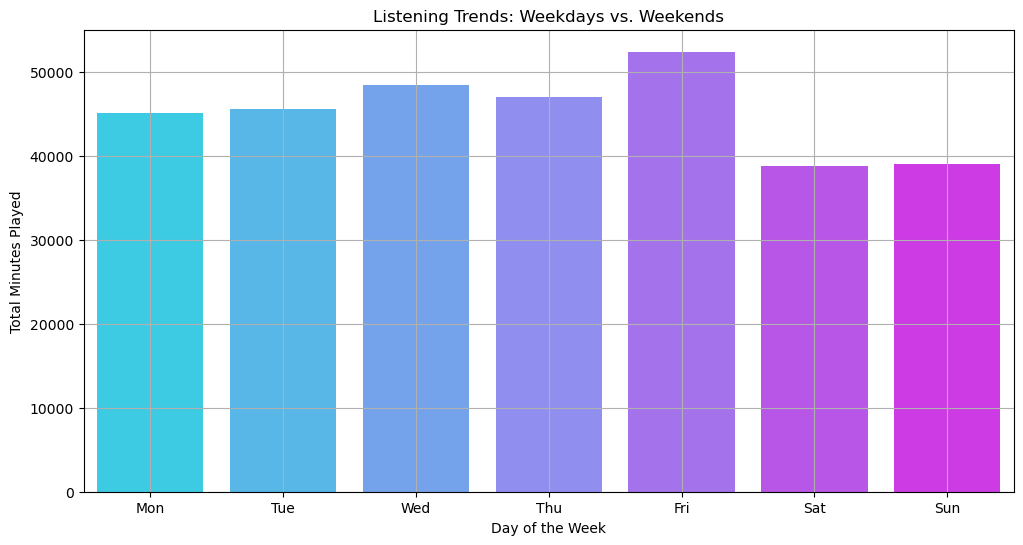

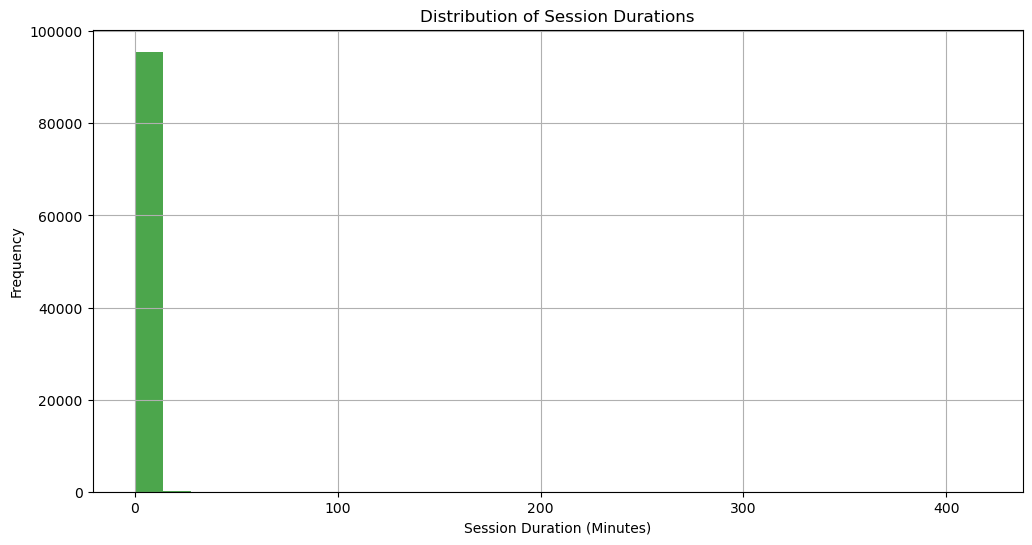

C:\Users\abeer\AppData\Local\Temp\ipykernel_14104\1703445732.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repeat_tracks.values, y=repeat_tracks.index, palette="magma")


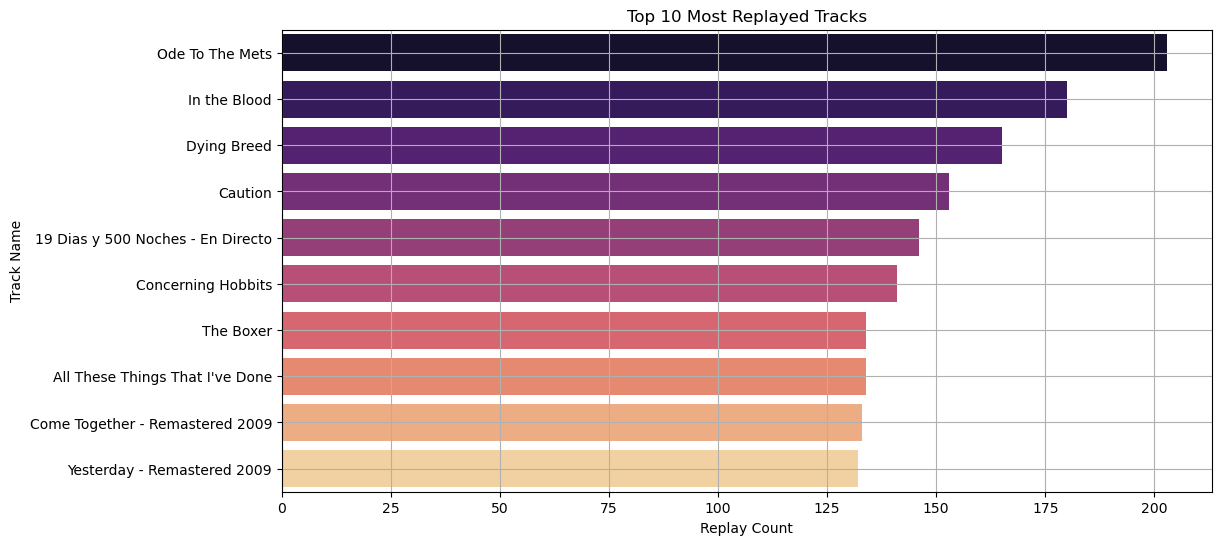

C:\Users\abeer\AppData\Local\Temp\ipykernel_14104\1703445732.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], y=seasonal_trends.values, palette="autumn")


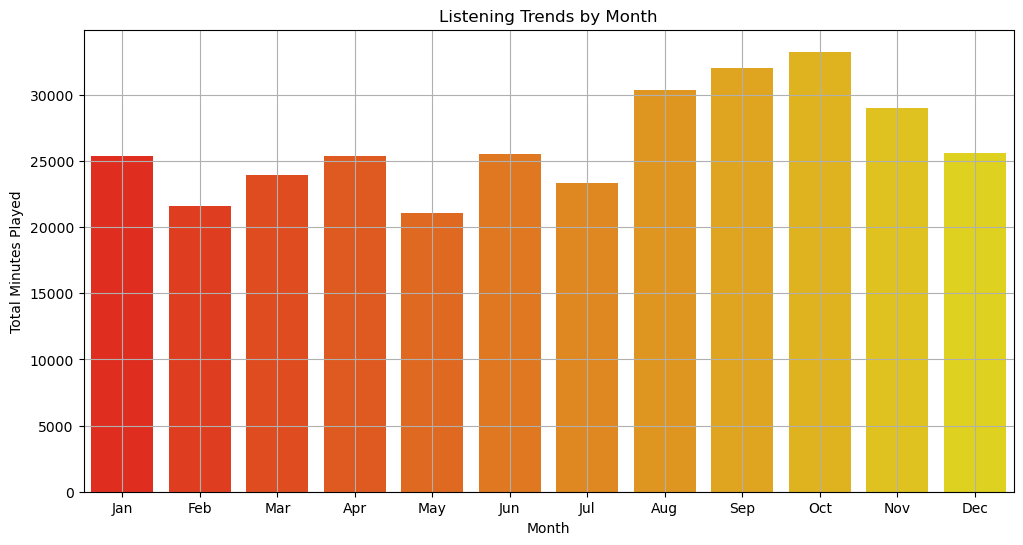

C:\Users\abeer\AppData\Local\Temp\ipykernel_14104\1703445732.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skip_rate_by_artist.values, y=skip_rate_by_artist.index, palette="coolwarm")


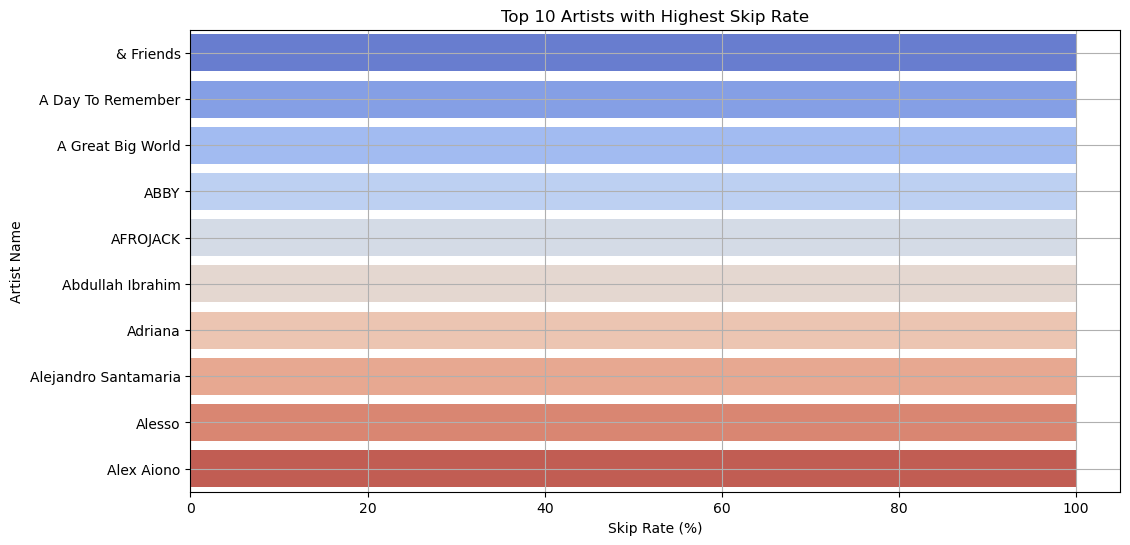

User Exploration Rate: 2.78% (Unique artists listened to vs. total plays)
EDA Completed! Cleaned data saved as 'Spotify_Track_History_Cleaned.csv'.


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Linkedin_Competititon_2025.csv", encoding='ISO-8859-1')

# Display basic information
print(df.info())
print(df.head())

# Rename timestamp column for consistency
df.rename(columns={"Time Stamp": "timestamp"}, inplace=True)

# Convert timestamp column to datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Extract useful time-based features
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["day"] = df["timestamp"].dt.day
df["hour"] = df["timestamp"].dt.hour
df["weekday"] = df["timestamp"].dt.weekday  # 0 = Monday, 6 = Sunday

# Convert milliseconds played to minutes
df["minutes_played"] = df["ms_played"] / (1000 * 60)

# Remove entries where track name or artist is missing
df_cleaned = df.dropna(subset=["track_name", "artist_name"])

# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Ensure 'track_name' is a string
df_cleaned["track_name"] = df_cleaned["track_name"].astype(str)

# ------------------ EXPLORATORY DATA ANALYSIS (EDA) ------------------ #

# 1. Listening Trends Over Time
plt.figure(figsize=(12, 5))
df_cleaned.groupby("year")["minutes_played"].sum().plot(kind="line", marker="o", color="b")
plt.title("Total Listening Time Per Year")
plt.xlabel("Year")
plt.ylabel("Total Minutes Played")
plt.grid()
plt.show()

# 2. Top 10 Most Played Tracks
plt.figure(figsize=(12, 6))
top_tracks = df_cleaned.groupby("track_name")["minutes_played"].sum().nlargest(10)
sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="viridis")
plt.title("Top 10 Most Played Tracks by Total Playtime")
plt.xlabel("Total Minutes Played")
plt.ylabel("Track Name")
plt.grid(axis="x")
plt.show()

# 3. Top 10 Artists by Playtime
plt.figure(figsize=(12, 6))
top_artists = df_cleaned.groupby("artist_name")["minutes_played"].sum().nlargest(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette="coolwarm")
plt.title("Top 10 Most Played Artists by Total Playtime")
plt.xlabel("Total Minutes Played")
plt.ylabel("Artist Name")
plt.grid(axis="x")
plt.show()

# 4. Hourly Listening Patterns
plt.figure(figsize=(12, 6))
df_cleaned.groupby("hour")["minutes_played"].sum().plot(kind="bar", color="purple")
plt.title("Listening Patterns by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Minutes Played")
plt.grid()
plt.show()

# 5. Weekday vs. Weekend Listening Trends
plt.figure(figsize=(12, 6))
weekday_vs_weekend = df_cleaned.groupby("weekday")["minutes_played"].sum()
sns.barplot(x=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], y=weekday_vs_weekend.values, palette="cool")
plt.title("Listening Trends: Weekdays vs. Weekends")
plt.xlabel("Day of the Week")
plt.ylabel("Total Minutes Played")
plt.grid()
plt.show()

# 6. Session Duration Analysis
session_durations = df_cleaned.groupby("timestamp")["minutes_played"].sum()
plt.figure(figsize=(12, 6))
session_durations.plot(kind="hist", bins=30, color="green", alpha=0.7)
plt.title("Distribution of Session Durations")
plt.xlabel("Session Duration (Minutes)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# 7. Repeat Track Behavior
repeat_tracks = df_cleaned["track_name"].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=repeat_tracks.values, y=repeat_tracks.index, palette="magma")
plt.title("Top 10 Most Replayed Tracks")
plt.xlabel("Replay Count")
plt.ylabel("Track Name")
plt.grid()
plt.show()

# 8. Seasonal Trends
plt.figure(figsize=(12, 6))
seasonal_trends = df_cleaned.groupby("month")["minutes_played"].sum()
sns.barplot(x=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], y=seasonal_trends.values, palette="autumn")
plt.title("Listening Trends by Month")
plt.xlabel("Month")
plt.ylabel("Total Minutes Played")
plt.grid()
plt.show()

# 9. Skip Rate by Artist & Track (if 'skipped' column exists)
if "skipped" in df_cleaned.columns:
    skip_rate_by_artist = df_cleaned.groupby("artist_name")["skipped"].mean().nlargest(10) * 100
    plt.figure(figsize=(12, 6))
    sns.barplot(x=skip_rate_by_artist.values, y=skip_rate_by_artist.index, palette="coolwarm")
    plt.title("Top 10 Artists with Highest Skip Rate")
    plt.xlabel("Skip Rate (%)")
    plt.ylabel("Artist Name")
    plt.grid()
    plt.show()

# 10. Song Completion Rate (if 'ms_played' and 'duration_ms' exist)
if "ms_played" in df_cleaned.columns and "duration_ms" in df_cleaned.columns:
    df_cleaned["completion_rate"] = (df_cleaned["ms_played"] / df_cleaned["duration_ms"]) * 100
    completion_rate_avg = df_cleaned["completion_rate"].mean()
    print(f"Average Song Completion Rate: {completion_rate_avg:.2f}%")

# 11. Exploration vs. Loyalty
unique_artists = df_cleaned["artist_name"].nunique()
total_plays = df_cleaned.shape[0]
artist_exploration_rate = (unique_artists / total_plays) * 100
print(f"User Exploration Rate: {artist_exploration_rate:.2f}% (Unique artists listened to vs. total plays)")

# Save cleaned data to CSV file for Power BI
df_cleaned.to_csv("Spotify_Track_History_Cleaned.csv", index=False)

# Check for successful execution
print("EDA Completed! Cleaned data saved as 'Spotify_Track_History_Cleaned.csv'.")
